In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [54]:
df = pd.read_csv("insurance.csv")
print(df.info())
print(df.isnull().sum())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1297 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1311 non-null   float64
 3   children  1306 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB
None
age         41
sex          0
bmi         27
children    32
smoker       0
region       0
charges      0
dtype: int64
age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object


In [55]:
missing_cols = df.columns[df.isnull().any()]

for col in missing_cols:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())


In [56]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [57]:
categorical_columns = df.select_dtypes(include=[object]).columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
print(categorical_columns)

Index(['sex', 'smoker', 'region'], dtype='object')


In [58]:
df = pd.get_dummies(df, columns= categorical_columns, drop_first=True)
print(df.dtypes)

age                 float64
bmi                 float64
children            float64
charges             float64
sex_male               bool
smoker_yes             bool
region_northwest       bool
region_southeast       bool
region_southwest       bool
dtype: object


In [59]:
df["bmi_smoker"] = df["bmi"] * df["smoker_yes"]
df["age_smoker"] = df["age"] * df["smoker_yes"]

In [60]:
x = df.drop("charges", axis=1)
y = df["charges"]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=24)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [62]:
#Linear Regression

lr= LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

print("Linear Regression")
print("MSE: ", mean_squared_error(y_test, y_pred_lr))
print("MAE: ", mean_absolute_error(y_test, y_pred_lr))
print("R2 Score: ", r2_score(y_test, y_pred_lr))


Linear Regression
MSE:  24104532.02034749
MAE:  3134.263868615632
R2 Score:  0.8417972474498909


In [63]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)


print("Decision Tree")
print("MSE: ", mean_squared_error(y_test, y_pred_dt))
print("MAE: ", mean_absolute_error(y_test, y_pred_dt))
print("R2 Score: ", r2_score(y_test, y_pred_dt))

Decision Tree
MSE:  44797180.037449956
MAE:  3357.536753917911
R2 Score:  0.7059873561359763


In [64]:
rf = RandomForestRegressor(random_state=24)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Random Forest")
print("MSE: ", mean_squared_error(y_test, y_pred_rf))
print("MAE: ", mean_absolute_error(y_test, y_pred_rf))
print("R2 Score: ", r2_score(y_test, y_pred_rf))

Random Forest
MSE:  23781567.660550363
MAE:  2923.95860722977
R2 Score:  0.8439169256354022


In [65]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf),
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
    ],
}


results_df = pd.DataFrame(results)
print(results_df)


               Model           MSE          MAE  R2 Score
0  Linear Regression  2.410453e+07  3134.263869  0.841797
1      Decision Tree  4.479718e+07  3357.536754  0.705987
2      Random Forest  2.378157e+07  2923.958607  0.843917


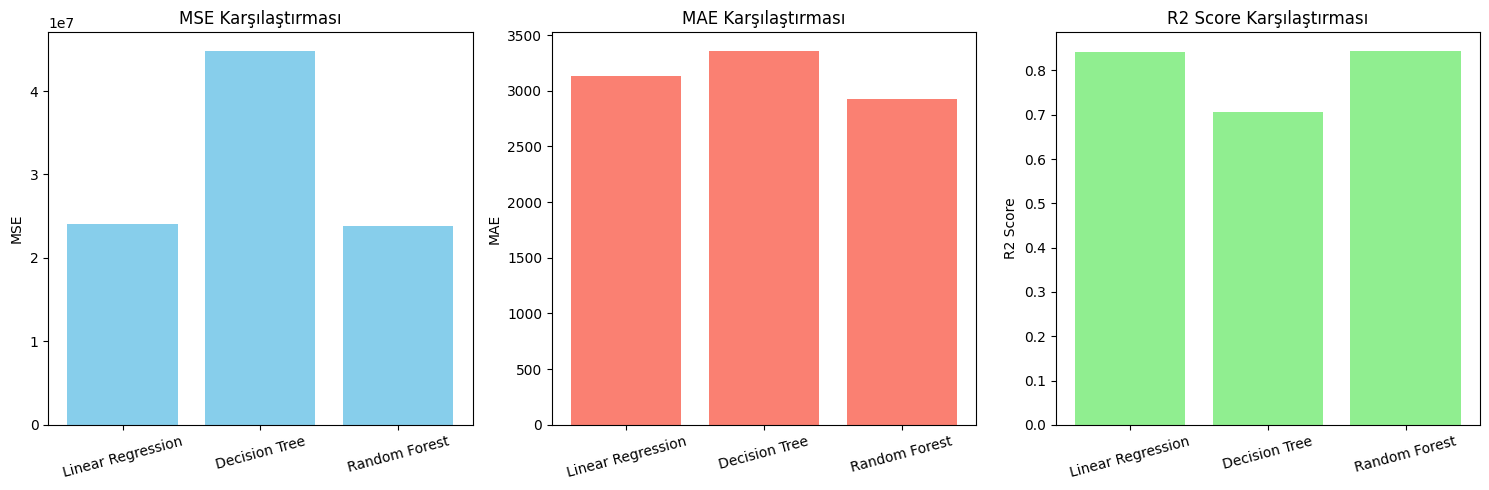

In [74]:
# Grafik boyutu
plt.figure(figsize=(15, 5))

# MSE
plt.subplot(1, 3, 1)
plt.bar(results_df["Model"], results_df["MSE"], color='skyblue')
plt.title("MSE Karşılaştırması")
plt.ylabel("MSE")
plt.xticks(rotation=15)

# MAE
plt.subplot(1, 3, 2)
plt.bar(results_df["Model"], results_df["MAE"], color='salmon')
plt.title("MAE Karşılaştırması")
plt.ylabel("MAE")
plt.xticks(rotation=15)

# R2 Score
plt.subplot(1, 3, 3)
plt.bar(results_df["Model"], results_df["R2 Score"], color='lightgreen')
plt.title("R2 Score Karşılaştırması")
plt.ylabel("R2 Score")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()
